In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_data = "mouse_drug_data.csv"
clinical_data = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_data)
clinical_df = pd.read_csv(clinical_data)

# Combine the data into a single dataset
full_df = pd.merge(mouse_df, clinical_df, on="Mouse ID")


# Display the data table for preview
full_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_df = full_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()
# drug_time = full_df.groupby(["Drug", "Timepoint"])
# tumor_mean = drug_time["Tumor Volume (mm3)"].mean().to_frame()
# tumor_mean.head()
# # Convert to DataFrame
# tumor_summary = [{"Drug":full_df.Drug,
#             "Timepoint":full_df.Timepoint,
#             "Tumor Volume":tumor_mean}]
tumor_df = pd.DataFrame(tumor_df)
tumor_df.reset_index(inplace=True)
# tumor_df

# Preview DataFrame
tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_error = full_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
te_df = tumor_error.to_frame()

# Preview DataFrame
te_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames

tumor_df_pivot = tumor_df.pivot_table(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
tumor_df_pivot.head()
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


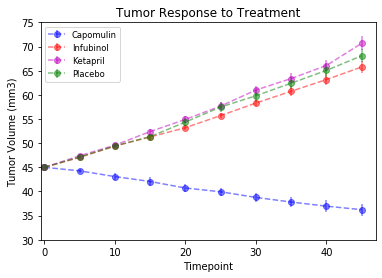

In [5]:
# Generate the Plot (with Error Bars)

fig, ax = plt.subplots()
ax.errorbar(tumor_df_pivot.index, tumor_df_pivot.Capomulin, yerr=tumor_error.Capomulin,
           fmt="o", color="b", ls="--",
           alpha=0.5, label="Capomulin")
ax.errorbar(tumor_df_pivot.index, tumor_df_pivot.Infubinol, yerr=tumor_error.Infubinol,
           fmt="o", color="r", ls="--",
           alpha=0.5, label="Infubinol")
ax.errorbar(tumor_df_pivot.index, tumor_df_pivot.Ketapril, yerr=tumor_error.Ketapril,
           fmt="o", color="m", ls="--",
           alpha=0.5, label="Ketapril")
ax.errorbar(tumor_df_pivot.index, tumor_df_pivot.Placebo, yerr=tumor_error.Placebo,
           fmt="o", color="g", ls="--",
           alpha=0.5, label="Placebo")
ax.set_xlim(-0.5,47)
ax.set_ylim(30, 75)
ax.set_xlabel("Timepoint")
ax.set_ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")
plt.legend(loc="best", fontsize="small", fancybox=True)


# Save the Figure
plt.savefig("Tumor_Response_to_Treatment.png")
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_error = full_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()
metastatic_mean = full_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()
# Convert to DataFrame
metastatic_error_df = pd.DataFrame(metastatic_error)
metastatic_mean_df = pd.DataFrame(metastatic_mean)
# Preview DataFrame
metastatic_error_df.head ()
metastatic_mean_df.head ()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
tumor_error = full_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()


# Convert to DataFrame
tumor_error_df = pd.DataFrame (tumor_error)
tumor_error_df_2 = tumor_error_df.reset_index(inplace=True)

# Preview DataFrame
tumor_error_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [8]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_df_pivot = metastatic_mean_df.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Sites')
metastatic_df_pivot.head()

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [9]:
metastatic_error_df = metastatic_error_df.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Sites')
metastatic_error_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


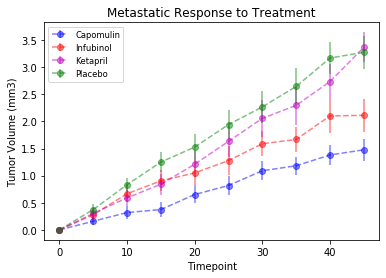

In [10]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
ax.errorbar(metastatic_df_pivot.index, metastatic_df_pivot.Capomulin, yerr=metastatic_error_df.Capomulin,
           fmt="o", color="b", ls="--",
           alpha=0.5, label="Capomulin")
ax.errorbar(metastatic_df_pivot.index, metastatic_df_pivot.Infubinol, yerr=metastatic_error_df.Infubinol,
           fmt="o", color="r", ls="--",
           alpha=0.5, label="Infubinol")
ax.errorbar(metastatic_df_pivot.index, metastatic_df_pivot.Ketapril, yerr=metastatic_error_df.Ketapril,
           fmt="o", color="m", ls="--",
           alpha=0.5, label="Ketapril")
ax.errorbar(metastatic_df_pivot.index, metastatic_df_pivot.Placebo, yerr=metastatic_error_df.Placebo,
           fmt="o", color="g", ls="--",
           alpha=0.5, label="Placebo")

ax.set_xlabel("Timepoint")
ax.set_ylabel("Tumor Volume (mm3)")
plt.title("Metastatic Response to Treatment")
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("Metastatic_Response_to_Treatment.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [11]:
full_df.columns

Index(['Mouse ID', 'Drug', 'Timepoint', 'Tumor Volume (mm3)',
       'Metastatic Sites'],
      dtype='object')

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_group = full_df.groupby(["Drug","Timepoint"])["Mouse ID"].count()


# Convert to DataFrame
mice_group_df = pd.DataFrame(mice_group)
mice_group_df_2 = mice_group_df.reset_index()

# Preview DataFrame
mice_group_df_2.head()





,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
mice_group_df_pivot = mice_group_df_2.pivot_table(index='Timepoint',columns='Drug',values='Mouse ID')


# Preview the Data Frame
mice_group_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


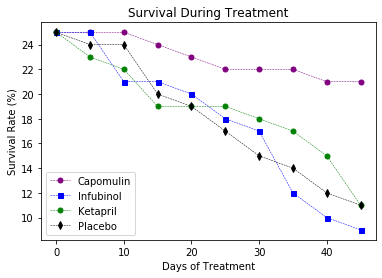

In [14]:
# Generate the Plot (Accounting for percentages)
fig, ax = plt.subplots()
ax.errorbar(mice_group_df_pivot.index, mice_group_df_pivot['Capomulin'],
            color='purple', marker='o', markersize=5, linestyle='--', linewidth=0.5, label = 'Capomulin')
ax.errorbar(mice_group_df_pivot.index, mice_group_df_pivot['Infubinol'],
            color='b', marker='s', markersize=5, linestyle='--', linewidth=0.5, label = 'Infubinol')
ax.errorbar(mice_group_df_pivot.index, mice_group_df_pivot['Ketapril'],
            color='g', marker='o', markersize=5, linestyle='--', linewidth=0.5, label = 'Ketapril')
ax.errorbar(mice_group_df_pivot.index, mice_group_df_pivot['Placebo'],
            color='black', marker='d', markersize=5, linestyle='--', linewidth=0.5, label = 'Placebo')
# Chart title
plt.title("Survival During Treatment")
# x label
plt.xlabel("Days of Treatment")
# y label
plt.ylabel("Survival Rate (%)")
# legend
plt.legend(loc='lower left')
# Save the Figure
plt.savefig("Survival Rate graph.png",bbox_inches="tight")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug
percent_change = (tumor_df_pivot.iloc[9,:] - tumor_df_pivot.iloc[0,:])/tumor_df_pivot.iloc[0,:]
# Display the data to confirm
percent_change

Drug
Capomulin   -0.194753
Ceftamin     0.425165
Infubinol    0.461235
Ketapril     0.570288
Naftisol     0.539233
Placebo      0.512980
Propriva     0.472412
Ramicane    -0.223209
Stelasyn     0.520851
Zoniferol    0.465798
dtype: float64

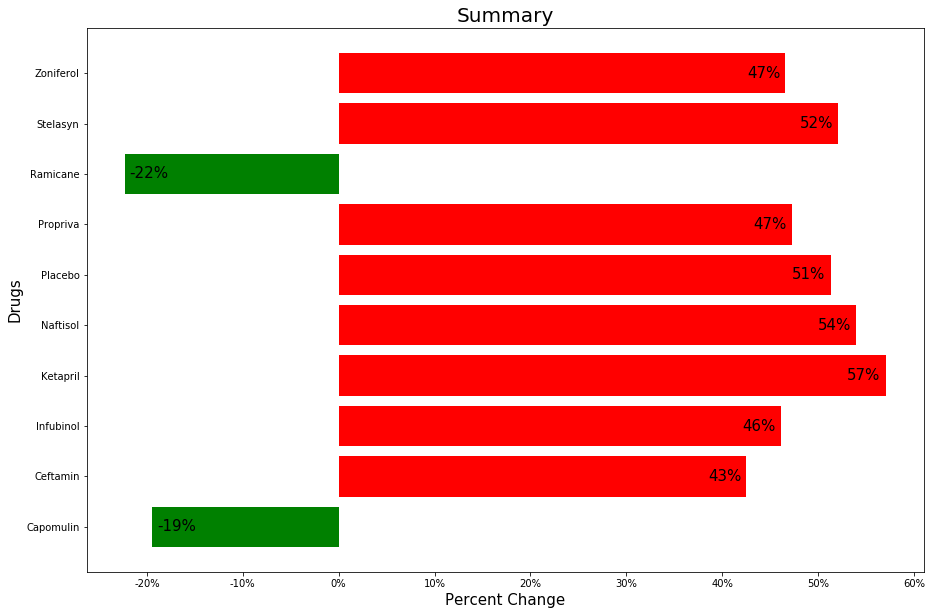

In [16]:
# Store all Relevant Percent Changes into a Tuple
drugs = tumor_df_pivot.columns
percentage = tuple(percent_change)
drugs = tuple(drugs)

# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc. 
fig, ax = plt.subplots(figsize=(15,10))
ax.barh(drugs, percentage,
        color=['red' if percentage[value] > 0 else 'green' for value in np.arange(len(drugs))])
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
plt.xlabel("Percent Change", size=15)
plt.ylabel("Drugs", size=15)
plt.title("Summary", size=20)
# Use functions to label the percentages of changes
def percent(ax, spacing=-5):
    rect = ax.patches
    for rect in ax.patches:
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2
        space = spacing
        ha = "right"
        if x_value < 0:
            ha = "left"
            space *= -1
        label = "{:.0%}".format(x_value)
        ax.annotate(label, (x_value, y_value), xytext=(space, 0),
                    textcoords="offset points", ha=ha, va="center", size=15)
# Call functions to implement the function calls
percent(ax)
# Save the Figure
plt.savefig("Summary.png")

![Metastatic Spread During Treatment](../Images/change.png)

Tumor Response to Treatment graph indicates that Capomulin drug is decreasing the volume size, the Placebo, Ketapril, Infubinol did not reduce the tumor volume at all. 
Ketapril is the most ineffective drug.

Metastatic Response to Treatment graph continues to support the same results as the first graph, Capomulin is the most effective drug. 

Survival During Treatment graph indicates that Capomulin has the greatest survival rate. 

Summary graph indicates that:
Ramicane reduced the tumor volume by -22%
Capomulin reduced the tumor volume by -19%
Since the other drugs show to have same rate of tumor increase as the Placebo, one can assume that these drugs have little to no effect on tumor size.

The greatest potential out of all the drugs that have been analyzed, Capomulin has the greatest chance of reducing the tumor.